# Mars Craters Study

Is the depth or diameter of the crater dependent on longitude and latitude? 

Import libraries 

In [6]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

#show all columns
pd.set_option('display.max_columns', None)

Read in data. Data can be downloaded from http://craters.sjrdesign.net/ 

In [4]:
#data = pd.read_csv('marscrater_pds.csv', low_memory=False)
#data = pd.read_csv('RobbinsCraters_20121016.tsv')
data = pd.read_csv('RobbinsCraters_20121016_2.csv', sep='\t')
data.head()

/home/mariaana/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (35,36,37,38,39,40,41,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,...,LAYER_4_AREA,LAYER_4_LOBATENESS,LAYER_4_EJECTARAD_EQUIV,LAYER_4_EJECTARAD_REL,LAYER_5_PERIMETER,LAYER_5_AREA,LAYER_5_LOBATENESS,LAYER_5_EJECTARAD_EQUIV,LAYER_5_EJECTARAD_REL,CRATER_NAME
0,01-000000,84.367,108.746,84.750,108.663,82.10,0.26,82.97,69.43,0.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-000001,72.760,164.464,72.784,164.464,82.02,0.09,84.17,79.91,0.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korolev
2,01-000002,69.244,-27.240,69.241,-27.235,79.63,NaN,84.36,75.28,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-000003,70.107,160.575,70.151,160.575,74.81,0.05,75.12,74.58,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-000004,77.996,95.617,77.998,95.615,73.53,0.23,77.28,70.13,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.describe()

,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,DIAM_ELLIPSE_ELLIP_IMAGE,DIAM_ELLIPSE_ANGLE_IMAGE,LATITUDE_CIRCLE_TOPOG,LONGITUDE_CIRCLE_TOPOG,DIAM_CIRCLE_TOPOG,DIAM_CIRCLE_SD_TOPOG,DEPTH_RIM_TOPOG,DEPTH_RIM_SD_TOPOG,DEPTH_SURFACE_TOPOG,DEPTH_SURFACE_SD_TOPOG,DEPTH_FLOOR_TOPOG,DEPTH_FLOOR_SD_TOPOG,DEPTH_RIMFLOOR_TOPOG,DEPTH_RIMHEIGHT_TOPOG,DEPTH_SURFFLOOR_TOPOG,PTS_USED_RIM_IMAGE,PTS_USED_RIM_TOPOG,PTS_USED_SURFACE,PTS_USED_FLOOR,PTS_USED_LOBE_1,PTS_USED_LOBE_2,PTS_USED_LOBE_3,PTS_USED_LOBE_4,PTS_USED_LOBE_5,NUMBER_LOBES,DEGRADATION_STATE,CONFIDENCE_IMPACT_CRATER,LAYER_1_PERIMETER,LAYER_1_AREA,LAYER_1_LOBATENESS,LAYER_1_EJECTARAD_EQUIV,LAYER_1_EJECTARAD_REL,LAYER_2_PERIMETER,LAYER_2_AREA,LAYER_2_LOBATENESS,LAYER_2_EJECTARAD_EQUIV,LAYER_2_EJECTARAD_REL,LAYER_3_PERIMETER,LAYER_3_AREA,LAYER_3_LOBATENESS,LAYER_3_EJECTARAD_EQUIV,LAYER_3_EJECTARAD_REL,LAYER_4_PERIMETER,LAYER_4_AREA,LAYER_4_LOBATENESS,LAYER_4_EJECTARAD_EQUIV,LAYER_4_EJECTARAD_REL,LAYER_5_PERIMETER,LAYER_5_AREA,LAYER_5_LOBATENESS,LAYER_5_EJECTARAD_EQUIV,LAYER_5_EJECTARAD_REL
count,384345.000000,384345.000000,384336.000000,384336.000000,384345.000000,368060.000000,384336.000000,384336.000000,384336.000000,384336.000000,384337.000000,76745.000000,76745.000000,76745.000000,7.322600e+04,76868.000000,76868.000000,76868.000000,76868.000000,76868.000000,76868.000000,76868.000000,76868.000000,76868.000000,384345.000000,76873.000000,78805.000000,76970.000000,13673.000000,1871.000000,223.000000,21.000000,1.0,19731.000000,74085.000000,384345.000000,13672.000000,13672.000000,13672.000000,13672.000000,13672.00000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,223.000000,223.000000,223.000000,223.000000,223.000000,21.000000,21.000000,21.000000,21.000000,21.000000,1.00,1.00,1.00,1.00,1.00
mean,-7.199344,10.128162,-7.200555,10.128915,3.556673,0.035189,3.727530,3.378996,0.424874,1.130761,36.021114,-9.938633,13.032614,11.230702,2.564188e+08,0.198974,0.071432,0.105122,0.114583,-0.180247,0.019601,0.379191,0.093820,0.285373,25.562786,46.453605,101.408096,29.098610,151.872742,341.046499,662.775785,879.523810,2562.0,1.262936,2.069137,3.994544,74.656484,211.505881,1.448286,4.382903,1.36478,167.684949,776.483089,1.730989,9.971513,2.385430,335.882197,2248.889103,2.027982,17.967982,2.588969,439.282857,3641.935714,2.071429,23.490000,2.344286,1293.59,23217.31,2.34,69.73,3.85
std,33.608932,96.641733,33.607636,96.641866,8.591972,0.033566,8.852149,8.071147,0.134485,0.122023,50.845572,33.636631,93.926668,15.481518,4.738570e+10,2.222266,0.083566,2.214142,0.140358,2.210117,0.020854,0.361005,0.129159,0.312722,44.356931,37.468384,54.268809,33.199407,120.477686,221.943999,371.855057,467.642451,NaN,0.545538,1.007342,0.103580,59.519068,492.753099,0.256699,2.900608,0.52585,111.706999,917.005572,0.345026,5.388432,0.927065,188.608656,2269.623713,0.483276,8.328335,1.254946,189.348267,3085.289562,0.291415,9.677799,0.448125,NaN,NaN,NaN,NaN,NaN
min,-86.700000,-179.997000,-86.700000,-179.996000,1.000000,0.000000,1.000000,0.540000,0.020000,1.000000,-179.000000,-86.725000,-179.997000,1.030000,3.000000e-02,-7.570000,0.000000,-7.590000,0.000000,-8.150000,0.000000,-0.420000,-1.120000,-1.620000,5.000000,4.000000,8.000000,2.000000,17.000000,44.000000,93.000000,400.000000,2562.0,1.000000,1.000000,0.000000,7.800000,0.200000,1.010000,0.020000,0.01000,20.480000,22.400000,1.060000,1.820000,0.630000,43.350000,81.550000,1.200000,3.800000,1.080000,211.180000,979.090000,1.440000,12.180000,1.710000,1293.59,23217.31,2.34,69.73,3.85
25%,-30.935000,-58.830000,-30.936000,-58.830250,1.180000,0.020000,1.260000,1.110000,0.330000,1.060000,-6.000000,-34.636000,-48.000000,3.750000,4.400000e-01,-1.370000,0.030000,-1.460000,0.030000,-1.760000,0.010000,0.120000,0.020000,0.070000,11.000000,12.000000,57.000000,6.000000,76.000000,178.000000,406.500000,537.000000,2562.0,1.000000,

Leave only relevant data; leave out layer data from the end of the table. 

In [14]:
#data_sub = data[['CRATER_NAME','LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE',
#                 'DIAM_CIRCLE_IMAGE','DEPTH_RIMFLOOR_TOPOG', 'NUMBER_LAYERS']]
data_sub = data.iloc[:,0:44]
data_sub['CRATER_NAME'] = data['CRATER_NAME']
data_sub.head()

,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,DIAM_ELLIPSE_ELLIP_IMAGE,DIAM_ELLIPSE_ANGLE_IMAGE,LATITUDE_CIRCLE_TOPOG,LONGITUDE_CIRCLE_TOPOG,DIAM_CIRCLE_TOPOG,DIAM_CIRCLE_SD_TOPOG,DEPTH_RIM_TOPOG,DEPTH_RIM_SD_TOPOG,DEPTH_SURFACE_TOPOG,DEPTH_SURFACE_SD_TOPOG,DEPTH_FLOOR_TOPOG,DEPTH_FLOOR_SD_TOPOG,DEPTH_RIMFLOOR_TOPOG,DEPTH_RIMHEIGHT_TOPOG,DEPTH_SURFFLOOR_TOPOG,PTS_USED_RIM_IMAGE,PTS_USED_RIM_TOPOG,PTS_USED_SURFACE,PTS_USED_FLOOR,PTS_USED_LOBE_1,PTS_USED_LOBE_2,PTS_USED_LOBE_3,PTS_USED_LOBE_4,PTS_USED_LOBE_5,NUMBER_LOBES,MORPHOLOGY_CRATER_1,MORPHOLOGY_CRATER_2,MORPHOLOGY_CRATER_3,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,MORPHOLOGY_EJECTA_COMMENTS,DEGRADATION_STATE,CONFIDENCE_IMPACT_CRATER,CRATER_NAME
0,01-000000,84.367,108.746,84.750,108.663,82.10,0.26,82.97,69.43,0.55,1.20,-34.0,84.511,107.904,79.84,1.01,-3.36,0.21,-3.57,0.39,-3.59,0.17,0.22,0.21,0.02,275,79.0,222.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxUnc,NaN,Floor Deposits,NaN,NaN,NaN,NaN,1.0,3,NaN
1,01-000001,72.760,164.464,72.784,164.464,82.02,0.09,84.17,79.91,0.31,1.05,44.0,72.769,164.542,82.02,7.76,-3.82,0.26,-4.66,0.09,-5.79,0.32,1.97,0.83,1.14,977,107.0,267.0,53.0,NaN,NaN,NaN,NaN,NaN,3.0,CpxUnc,Terraced,Slump Deposits / Floor Deposits,Rd/MLERS,HuBL,NaN,NaN,3.0,4,Korolev
2,01-000002,69.244,-27.240,69.241,-27.235,79.63,NaN,84.36,75.28,0.45,1.12,-23.0,69.237,-27.622,83.22,7.99,-5.15,0.03,-5.16,0.03,-5.25,0.02,0.09,0.01,0.08,435,126.0,194.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxUnc,NaN,Floor Deposits / Ejecta Deposits,NaN,NaN,NaN,NaN,1.0,4,NaN
3,01-000003,70.107,160.575,70.151,160.575,74.81,0.05,75.12,74.58,0.12,1.01,99.0,70.111,160.583,76.22,5.13,-4.51,0.04,-4.49,0.05,-4.64,0.02,0.13,-0.02,0.15,370,168.0,237.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxFF,NaN,Floor Deposits / Ejecta Deposits,NaN,NaN,NaN,NaN,1.0,4,NaN
4,01-000004,77.996,95.617,77.998,95.615,73.53,0.23,77.28,70.13,0.42,1.10,-8.0,77.965,95.889,69.21,4.97,-4.40,0.04,-4.40,0.05,-4.50,0.01,0.11,0.00,0.10,422,180.0,184.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,CpxFF,NaN,Floor Deposits,NaN,NaN,NaN,NaN,1.0,4,NaN


New column; has crater given a name

In [15]:
def isCaterNamed(row):
    # no name given 
    #if np.isnan(row['CRATER_NAME']) :
    if type(row['CRATER_NAME']) != str :
      val = 0
    else : # name is given 
      val = 1
    return val

#data_sub['IS_NAMED'] = data_sub.apply(lambda row: isCaterNamed(row),axis=1)
data_sub['IS_NAMED'] = data_sub.apply(isCaterNamed, axis=1)

Find eight categories for latitudes which divide surface to equal areas.  

Lets presume Mars is a sphere. 

source: https://notmatthancock.github.io/2017/12/26/regular-area-sphere-partitioning.html

In [17]:
m = 8 # number of categories 
r = 1.0 # radius of the sphere 

#longitudes
theta,delta_theta = np.linspace(0, 2*np.pi, m+1, retstep=True)
delta_S = delta_theta / (m/2) 

#latitudes
phi = 1-np.arange(m) * delta_S / (r**2 * delta_theta)  
phi = np.arccos(phi)

#convert rad to deg and scale 
theta = theta * 180 / np.pi - 180 # scale values to [-180,180] deg
phi = phi * 180 / np.pi - 90 # scale values to [-90,90] deg
phi = np.append(phi, 90) 
phi

array([-90.        , -48.59037789, -30.        , -14.47751219,
         0.        ,  14.47751219,  30.        ,  48.59037789,
        90.        ])

Split Longitude, 8 categories

In [18]:
labels_long=["-180 - -135", "-135 - -90", "-90 - -45" ,"- 45 - 0", 
             "0 - 45", "45 - 90", "90 - 135", "135 - 180"]
data_sub['LONGITUDE_CATEGORY'] = pd.cut(data_sub.LONGITUDE_CIRCLE_IMAGE, bins = theta, labels=labels_long)

Split Latitude, 8 categories

In [19]:
labels_lat=["-90 - -48.6", "-48.6 - -30" ,"-30 - -14.5", "-14.5 - 0", 
            "0 - 14.5", "14.5 - 30","30 - 48.6", "48.6 - 90"]
data_sub['LATITUDE_CATEGORY'] = pd.cut(data_sub.LONGITUDE_CIRCLE_IMAGE, bins = phi, labels=labels_lat)

Crater depth by longitude 

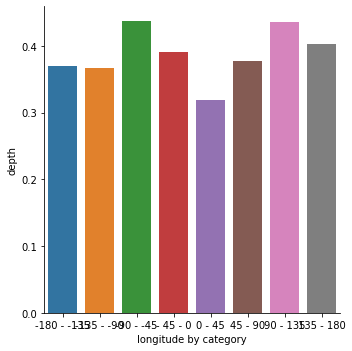

In [25]:
seaborn.catplot(x='LONGITUDE_CATEGORY', y='DEPTH_RIMFLOOR_TOPOG', data=data_sub, kind="bar", ci=None)
plt.xlabel('longitude by category')
plt.ylabel('depth');

Crater depth by latitude 

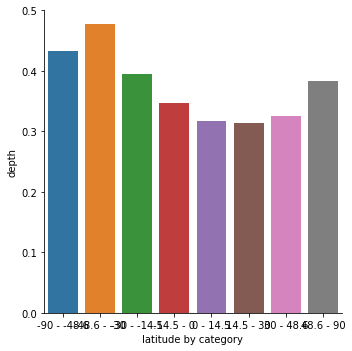

In [28]:
seaborn.catplot(x='LATITUDE_CATEGORY', y='DEPTH_RIMFLOOR_TOPOG', data=data_sub, kind="bar", ci=None)
plt.xlabel('latitude by category')
plt.ylabel('depth');

Crater diameter by longitude 

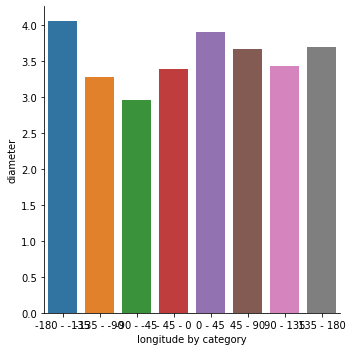

In [27]:
seaborn.catplot(x='LONGITUDE_CATEGORY', y='DIAM_CIRCLE_IMAGE', data=data_sub, kind="bar", ci=None)
plt.xlabel('longitude by category')
plt.ylabel('diameter');

Crater diameter by longitude

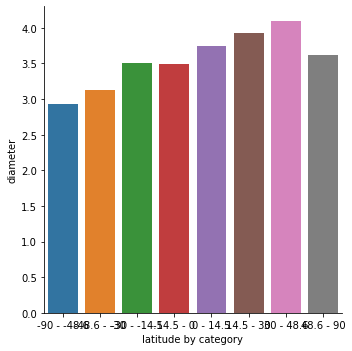

In [29]:
seaborn.catplot(x='LATITUDE_CATEGORY', y='DIAM_CIRCLE_IMAGE', data=data_sub, kind="bar", ci=None)
plt.xlabel('latitude by category')
plt.ylabel('diameter');